**Import necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


**Load dataset**

In [ ]:
data = pd.read_csv('/content/flights.csv')

**Data Visualization**
**Plot histograms for each numeric column**

<ipython-input-8-aa86ee892c00>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


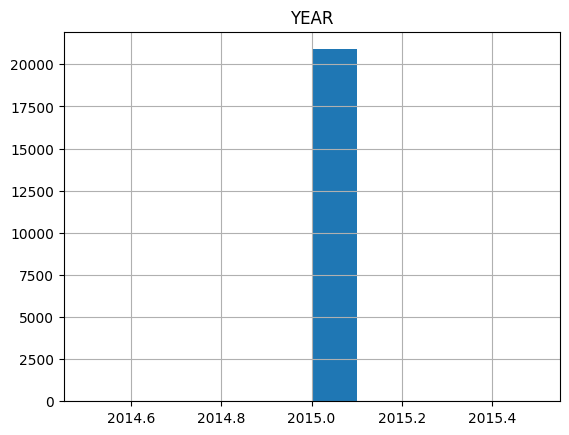

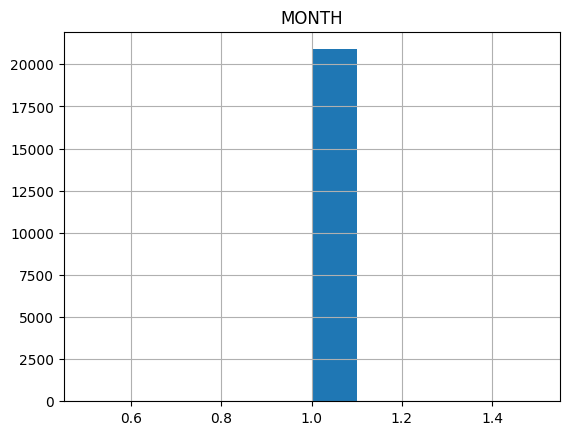

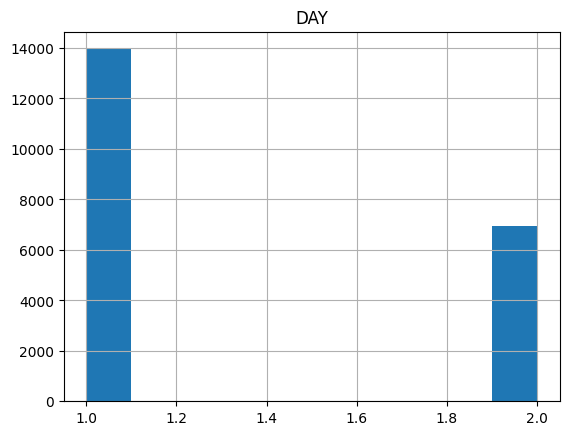

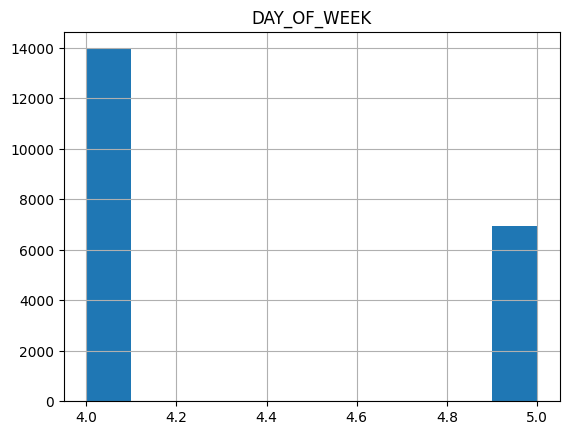

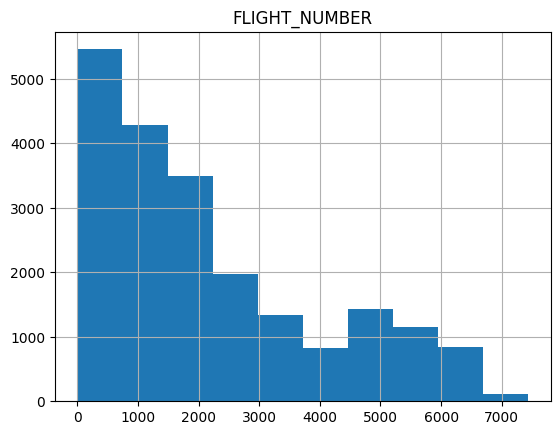

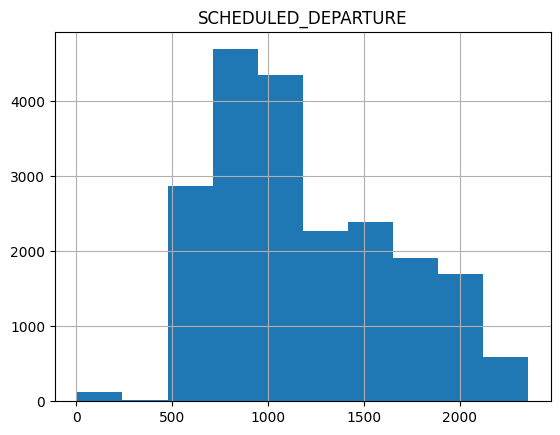

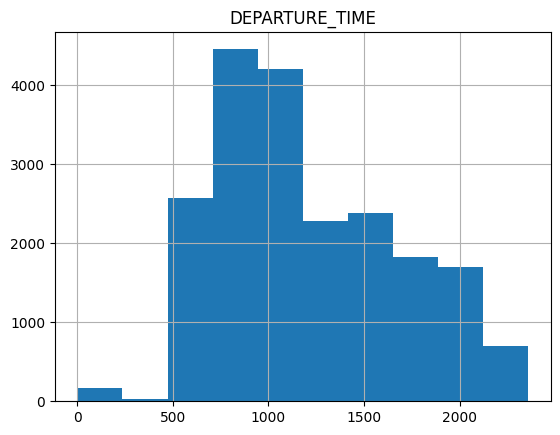

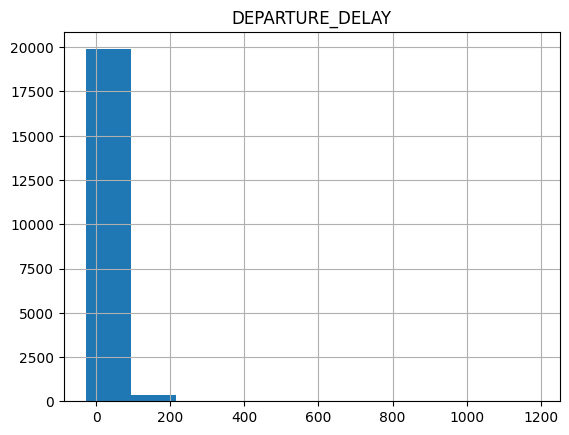

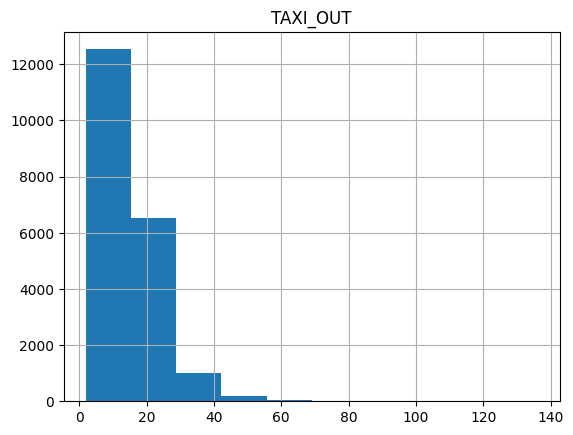

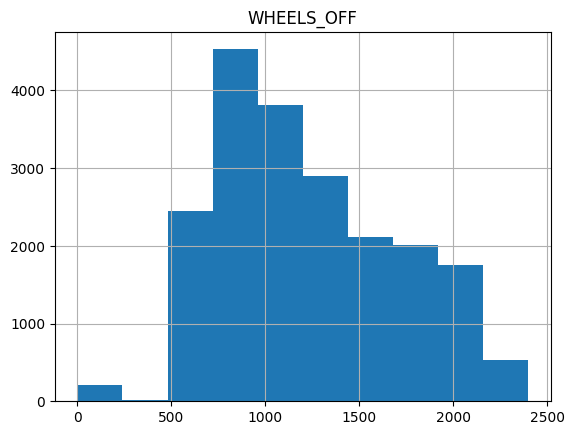

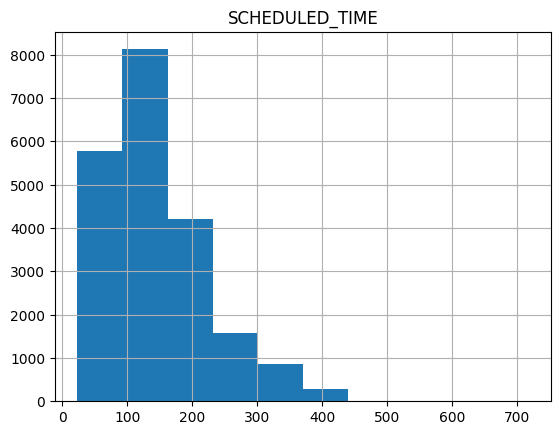

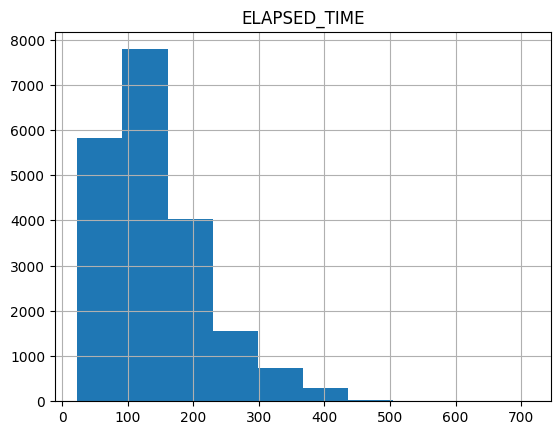

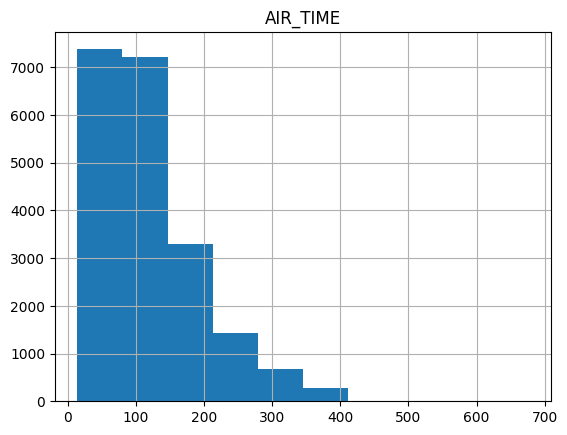

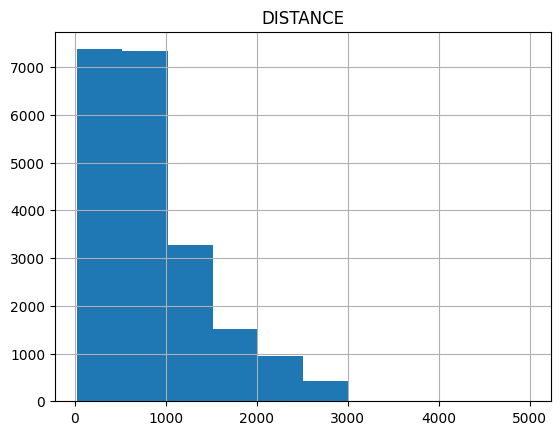

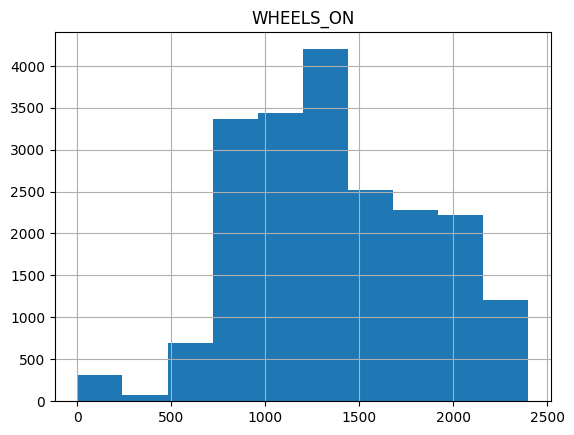

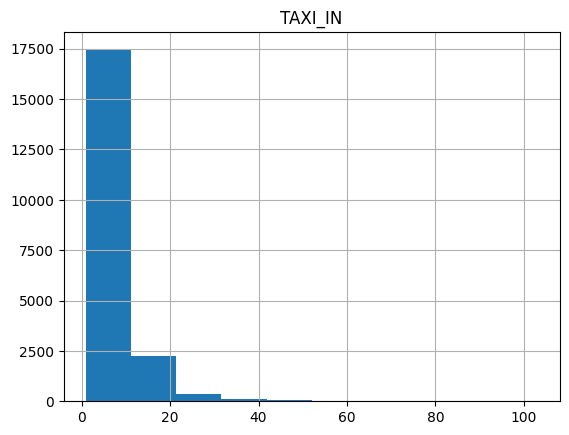

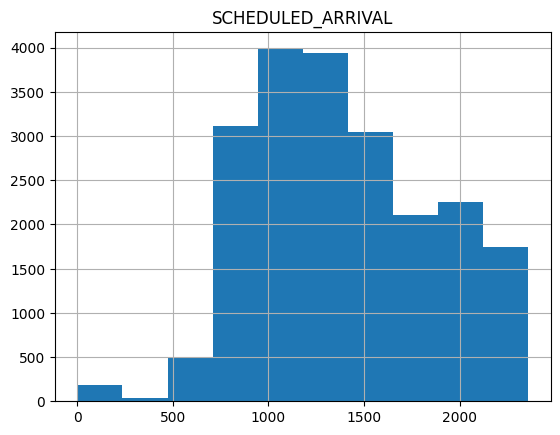

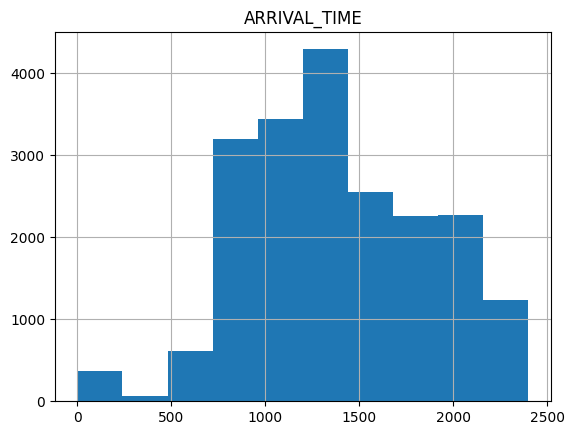

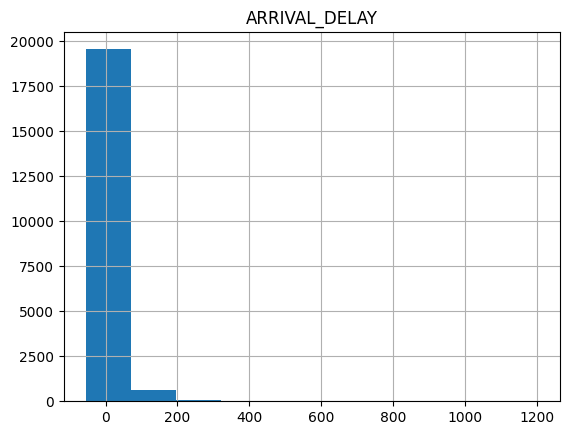

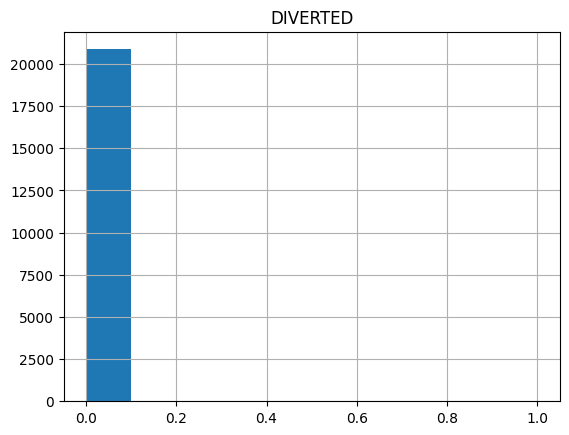

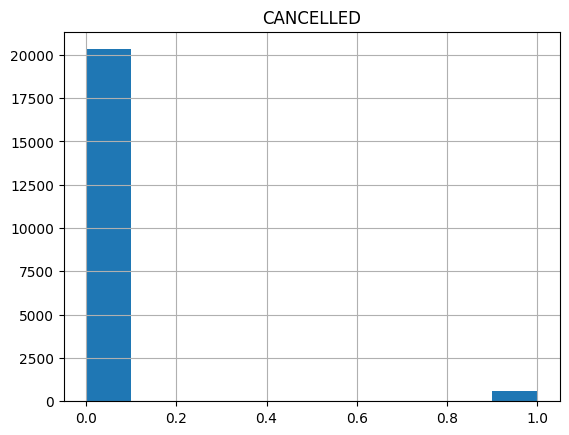

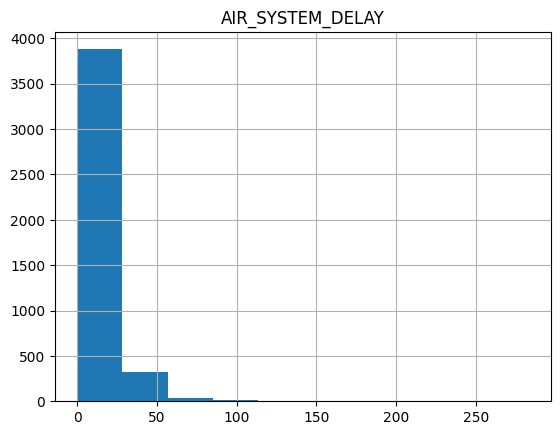

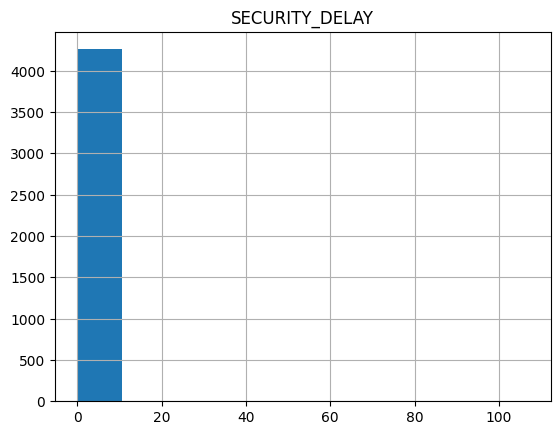

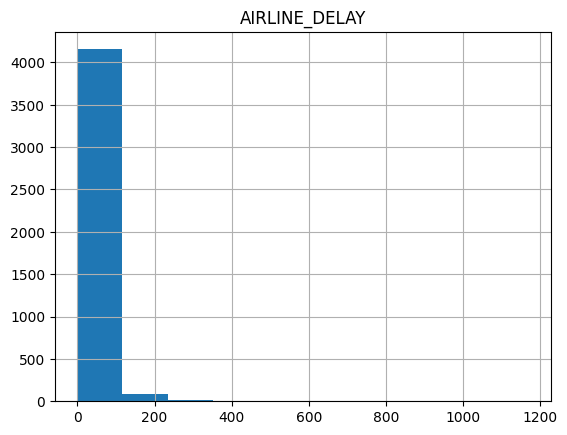

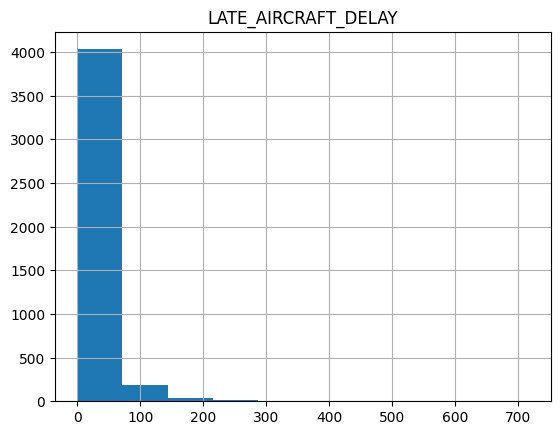

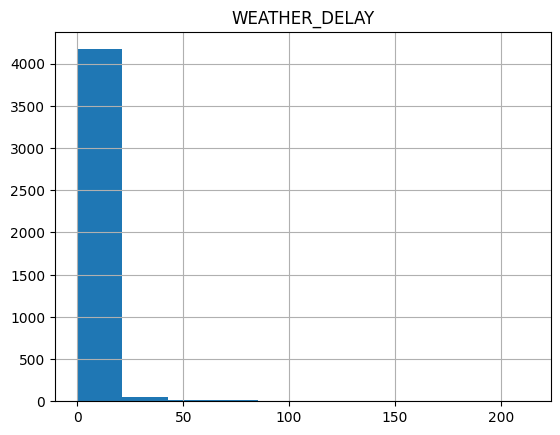

In [ ]:
for column in data.select_dtypes(include='number').columns:
    plt.figure()
    data[column].hist()
    plt.title(column)

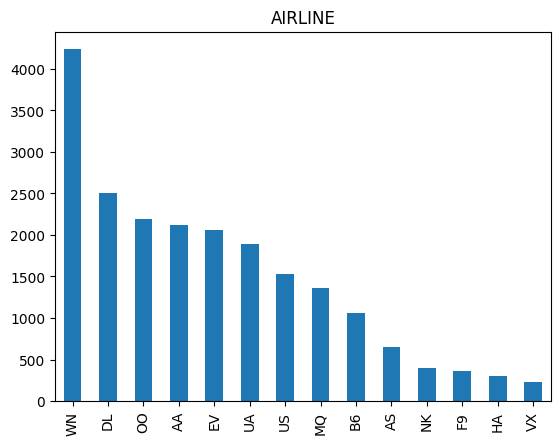

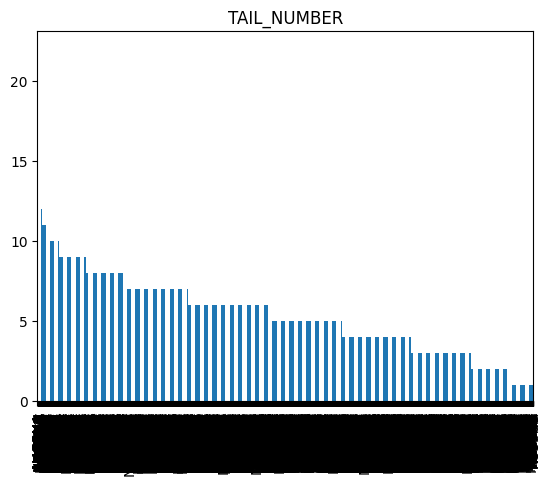

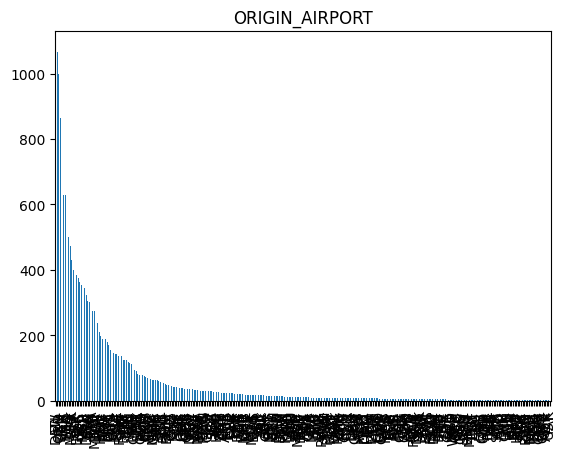

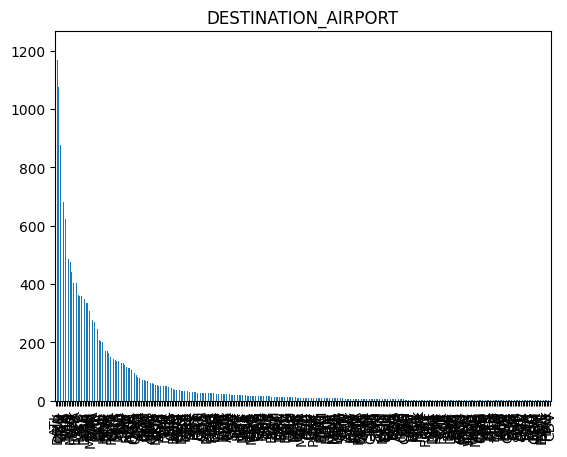

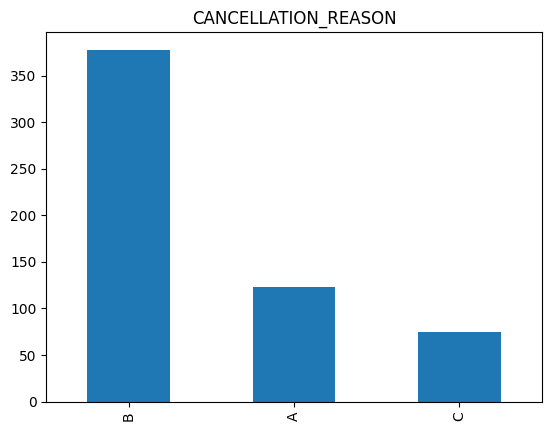

In [ ]:
# Plot bar plots for each categorical column
for column in data.select_dtypes(include='object').columns:
    plt.figure()
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

**Plot a correlation matrix**


<ipython-input-10-026a0064668c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

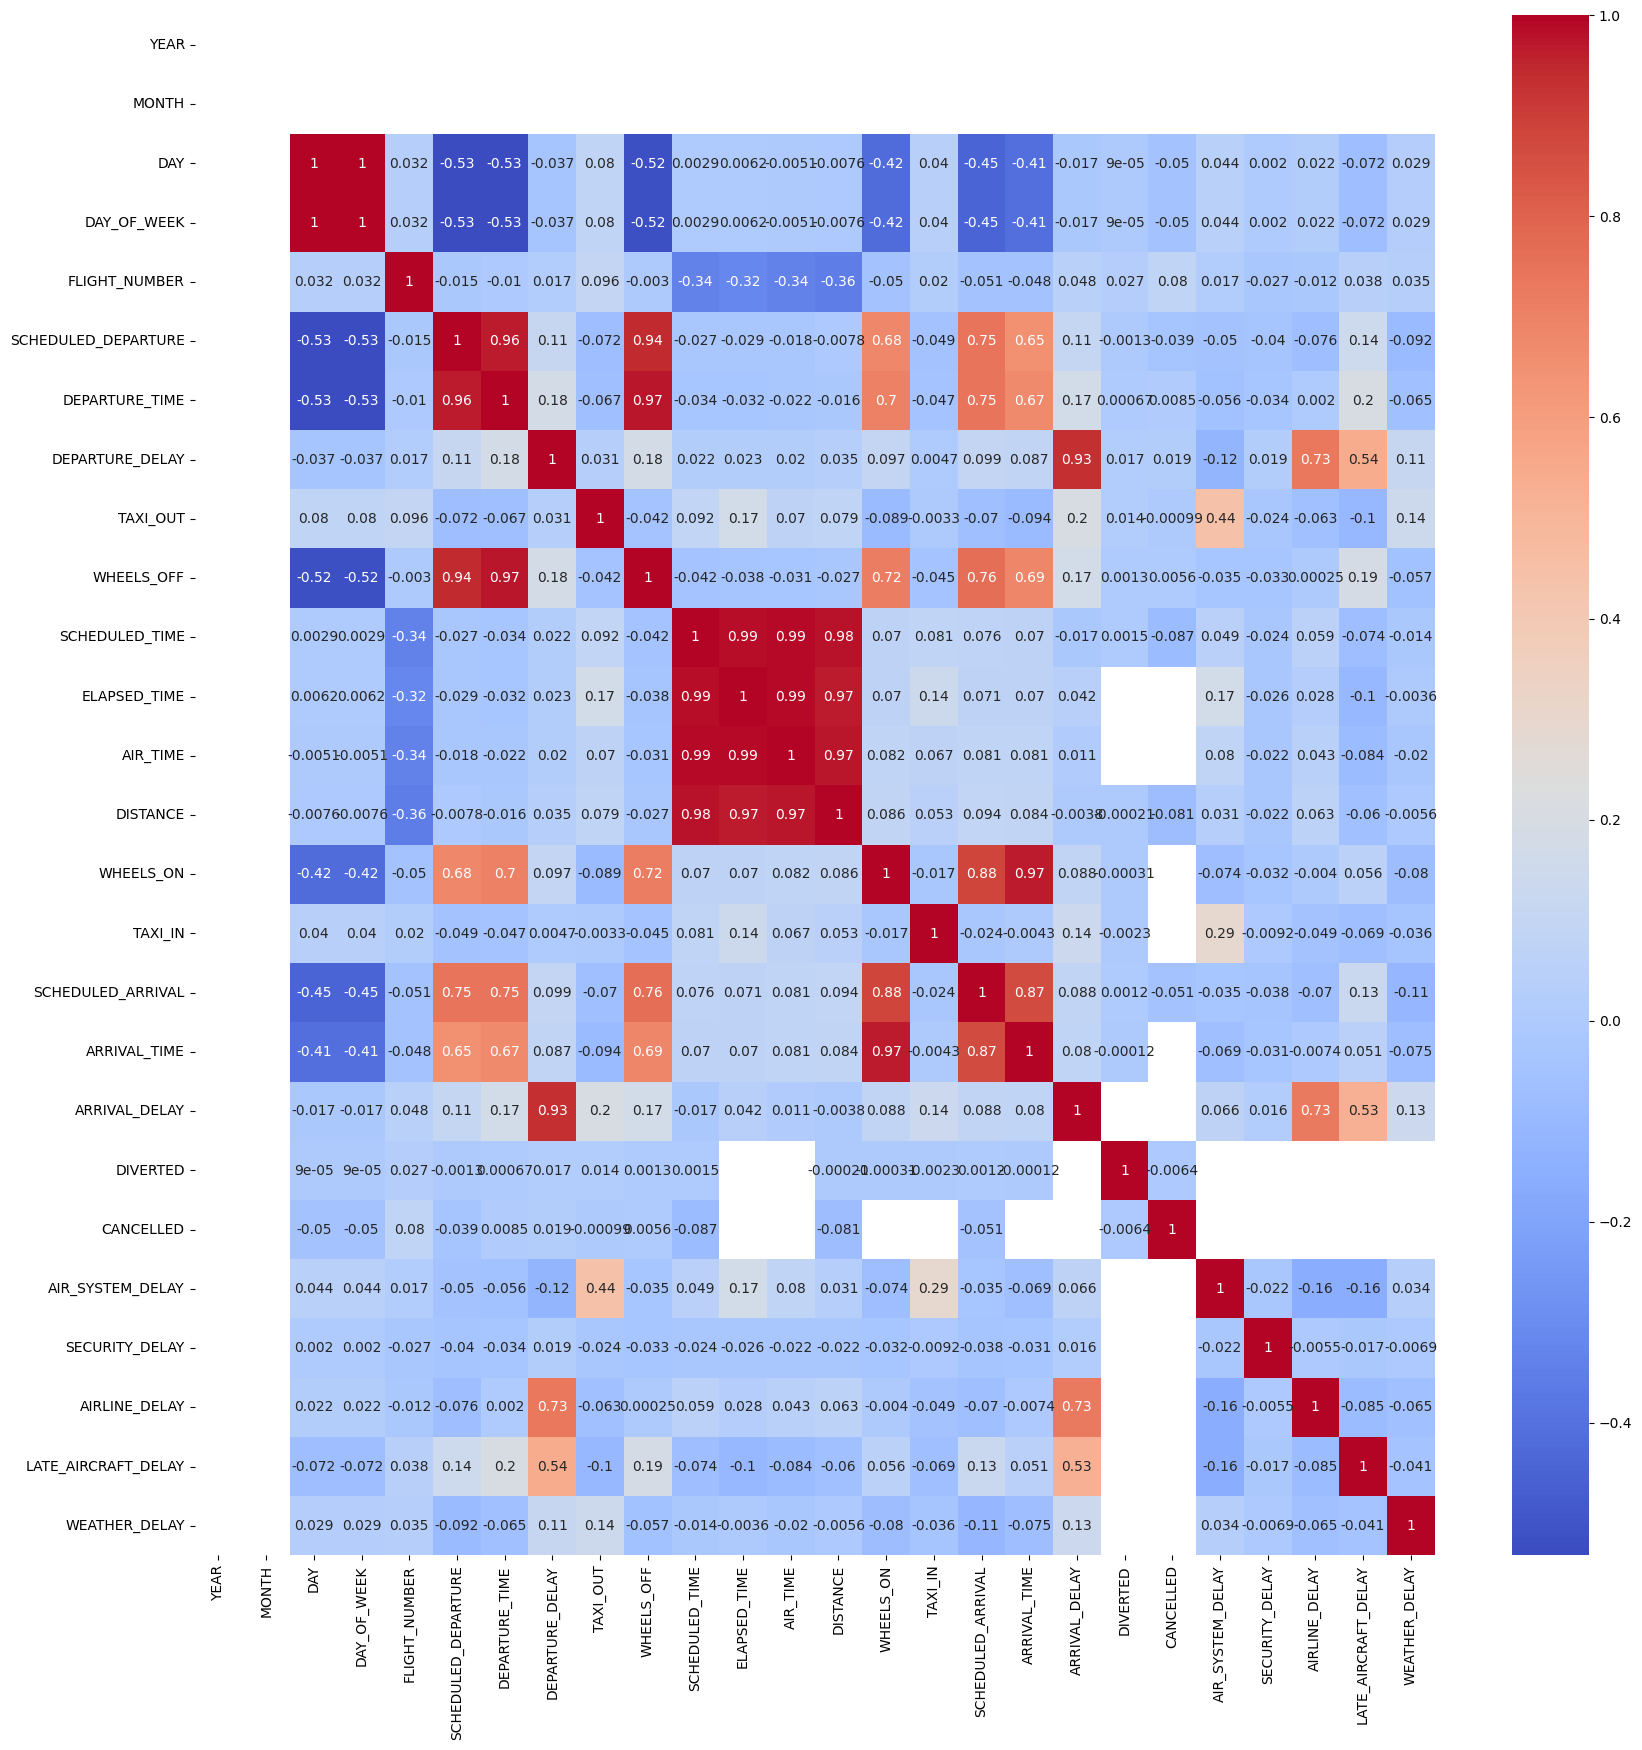

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

**Assume 'ARRIVAL_DELAY' is the target variable and the rest are features**

In [ ]:
X = data.drop('ARRIVAL_DELAY', axis=1)
y = data['ARRIVAL_DELAY']

**Identify categorical columns**

In [ ]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns

**One-hot encode categorical variables**

In [ ]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_cols)], remainder='passthrough')

**Create a pipeline that first transforms the data**

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('scaler', StandardScaler(with_mean=False))])  # Set with_mean=False

**Apply transformations**

In [ ]:
X_transformed = pipe.fit_transform(X)

**Convert sparse matrix to dense matrix**



In [ ]:
X_transformed = X_transformed.toarray()

**Split data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=50, random_state=45)

**the model represents an Artificial Neural Network (ANN) model in deep learning, compile, train, and evaluate your Sequential model**

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(20, activation='relu'))  # Input layer
    model.add(Dense(60, activation='relu'))  # Hidden layer
    model.add(Dense(55, activation='relu'))  # Another hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

**Create the model**

In [ ]:
model = create_model()

**Train the model**

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=80)

Epoch 1/10
261/261 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 2/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 3/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 4/10
261/261 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0224
Epoch 5/10
261/261 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0224
Epoch 6/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 7/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 8/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 9/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224
Epoch 10/10
261/261 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0224


**Evaluate the model**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100}%')

2/2 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0400
Test Accuracy: 3.999999910593033%
